# Miniproyecto 2

### Solución cerrada de regresión lineal

* Utilizando numpy (np.random) genere 100 datos que se encuentren entre 0 y 3. Este vector representará su variable independiente

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2)
x = 3*np.random.rand(100, 1)        # 100 datos aleatorios que estan entre 0 y 3

* Con la misma librería genere los 100 datos de la variable dependiente de la siguiente forma: $$y = 5 +2x + u(-2,5)$$

In [58]:
u = np.random.uniform(-2, 5, 100)   # datos uniformes entre -2 y 5
u = u.reshape(100, 1)
y = 5 + 2*x + u                     # variable dependiente segun la formula dada

* Por medio de matplotlib (o seaborn) genere un gráfico de dispersión (scatter plot) entre la variable dependiente y la variable independiente.

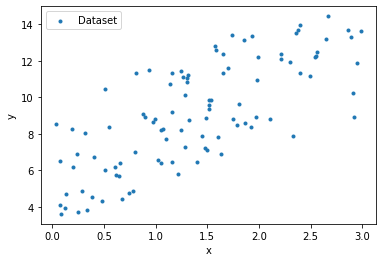

In [59]:
plt.scatter(x, y, marker=".")
plt.ylabel('y')
plt.xlabel('x')
plt.legend(["Dataset"])
plt.show()

* Estudie y aplique los métodos disponibles en numpy.linalg para ajustar una regresión lineal a través de su solución cerrada.

In [60]:
x_ = np.c_[np.ones((100,1)), x]
theta_opt = np.linalg.inv(x_.T.dot(x_)).dot(x_.T).dot(y)
theta_opt 

array([[5.36419458],
       [2.69302525]])

In [61]:
x_nuevo = np.array([[0], [3]])
x_nuevo_ = np.c_[np.ones((2,1)), x_nuevo]
y_pred = x_nuevo_.dot(theta_opt)
y_pred

array([[ 5.36419458],
       [13.44327033]])

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(theta_opt, y_pred).round(3)           # error cuadratico medio para la solucion


57.784

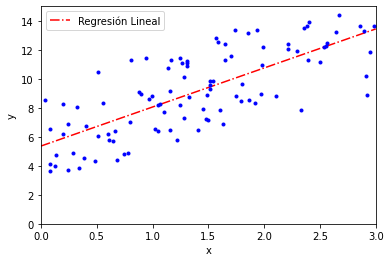

In [63]:
plt.plot(x_nuevo, y_pred, 'r-.')
plt.plot(x,y, "b.")
plt.ylabel('y')
plt.xlabel('x')
plt.axis([0, 3, 0, 15])
plt.legend(["Regresión Lineal"])
plt.show()                                      # Scatter plot con la regresion para el dataset

### Regresión Polinomial

*  lea el archivo ts.csv utilizando pandas. Trabaje con una muestra de 200 datos.

In [64]:
data = pd.read_csv("ts.csv").sample(200)        # muestra de 200 datos para el dataset
data = data.sort_values(by=['tiempo'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 10 to 1221
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tiempo    200 non-null    float64
 1   magnitud  200 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


* Visualizar la curva de luz con un scatter plot.

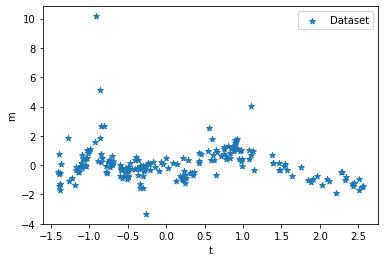

In [65]:
m_y = data["magnitud"]
t_x = data["tiempo"].values.reshape(-1,1)

plt.scatter(t_x,m_y, marker="*")
plt.ylabel('m')
plt.xlabel('t')
plt.legend(["Dataset"])
plt.show()

* Genere una transformación polinomial de la variable independiente

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

def reg_polymonial(p):
    poly_reg = PolynomialFeatures(degree=p)
    t_poly = poly_reg.fit_transform(t_x)
    pol_reg = LinearRegression()
    pol_reg.fit(t_poly, m_y)
    plt.figure(figsize= (13,4))
    plt.scatter(t_x, m_y, color='blue', marker="*")
    plt.plot(t_x, pol_reg.predict(poly_reg.fit_transform(t_x)), color='red')
    plt.title("Curva de luz (Regresion polinomial de grado " + str(p) + ")")
    plt.xlabel('Tiempo')
    plt.ylabel('Magnitud')
    plt.show()
    return


* Ajuste regresiones polinomiales de diferentes grados.
* Grafique los modelos resultantes, ¿qué observa a medida que aumenta el grado del polinomio?


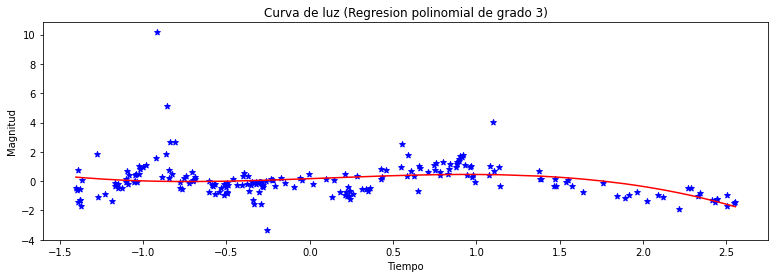

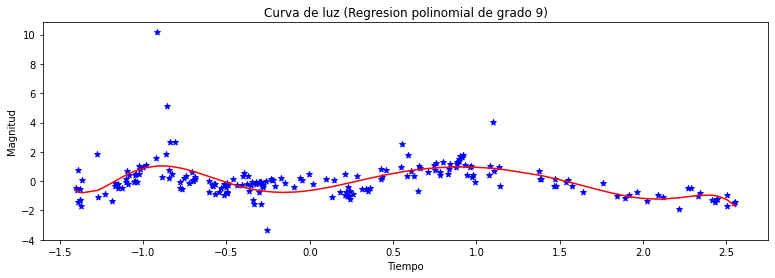

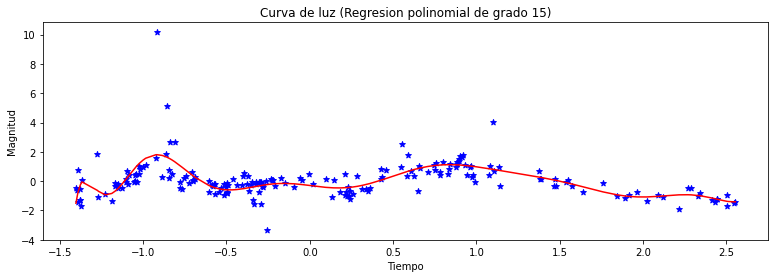

In [67]:
reg_polymonial(3)
reg_polymonial(9)
reg_polymonial(15)

> Con un grado mas pequeño la curva se ajusta de manera mas suave a los datos y a medida que aumenta el grado del polinomio se observa que la curva se ajusta de manera mas compleja al conjunto de datos.

### Regresión con Penalización

* Utilizando la misma curva de luz ts.csv y polinomios de diferentes grados, experimente con regresión Ridge y Lasso.

> Regresion Ridge

In [68]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")

def rid_reg_polymonial(p, alpha):
    poly_reg = PolynomialFeatures(degree=p)
    t_poly = poly_reg.fit_transform(t_x)
    pol_reg = Ridge(alpha= alpha, normalize=True)
    pol_reg.fit(t_poly, m_y)
    plt.figure(figsize= (13,4))
    plt.scatter(t_x, m_y, color='blue', marker="*")
    plt.plot(t_x, pol_reg.predict(poly_reg.fit_transform(t_x)), color='red')
    plt.title("Curva de luz (Regresion polinomial de grado " + str(p) + ") " + "ridge alpha = " + str(alpha))
    plt.xlabel('Tiempo')
    plt.ylabel('Magnitud')
    plt.show()
    print((t_x, pol_reg.predict(poly_reg.fit_transform(t_x))))      # imprime los coeficientes de la curva
    return
    

> Para observar el comportamiento de alfa para la penalizacion ridge, se grafican 2 set de graficos:
* 2 plots de grado 15 con alfas de 1e-15 y 1e-7
* 2 plots de grado 10 con alfas de 1e-15 y 1e-7

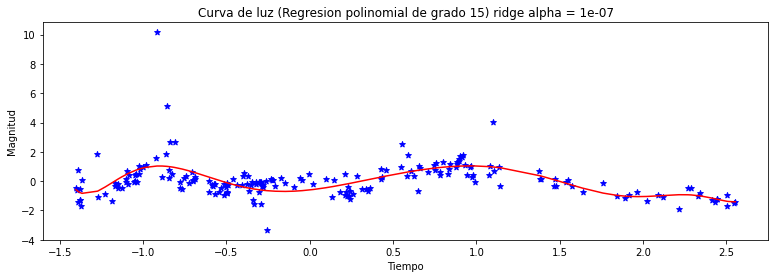

(array([[-1.40326768],
       [-1.39458335],
       [-1.39296882],
       [-1.38867264],
       [-1.38003502],
       [-1.37987977],
       [-1.37831545],
       [-1.37547797],
       [-1.36673697],
       [-1.27385733],
       [-1.26802181],
       [-1.22734706],
       [-1.18816341],
       [-1.16767989],
       [-1.16765293],
       [-1.15041968],
       [-1.14898133],
       [-1.12861022],
       [-1.10371433],
       [-1.10226761],
       [-1.09776599],
       [-1.092213  ],
       [-1.08618115],
       [-1.05302056],
       [-1.05147527],
       [-1.05010745],
       [-1.04140371],
       [-1.0366691 ],
       [-1.02675114],
       [-1.02528657],
       [-1.0208977 ],
       [-1.00060894],
       [-0.98461321],
       [-0.92353031],
       [-0.91626661],
       [-0.88511287],
       [-0.86490442],
       [-0.85768259],
       [-0.84457949],
       [-0.84307868],
       [-0.84145878],
       [-0.82720507],
       [-0.8111816 ],
       [-0.77742966],
       [-0.77634096],
       [-

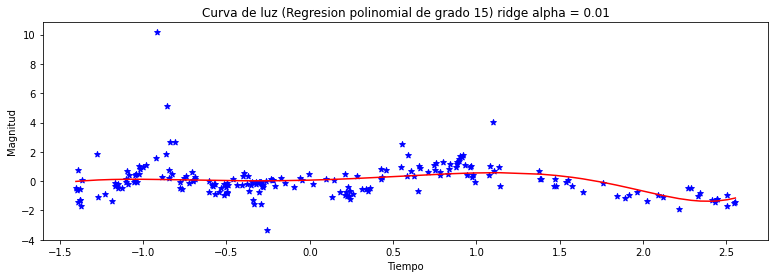

(array([[-1.40326768],
       [-1.39458335],
       [-1.39296882],
       [-1.38867264],
       [-1.38003502],
       [-1.37987977],
       [-1.37831545],
       [-1.37547797],
       [-1.36673697],
       [-1.27385733],
       [-1.26802181],
       [-1.22734706],
       [-1.18816341],
       [-1.16767989],
       [-1.16765293],
       [-1.15041968],
       [-1.14898133],
       [-1.12861022],
       [-1.10371433],
       [-1.10226761],
       [-1.09776599],
       [-1.092213  ],
       [-1.08618115],
       [-1.05302056],
       [-1.05147527],
       [-1.05010745],
       [-1.04140371],
       [-1.0366691 ],
       [-1.02675114],
       [-1.02528657],
       [-1.0208977 ],
       [-1.00060894],
       [-0.98461321],
       [-0.92353031],
       [-0.91626661],
       [-0.88511287],
       [-0.86490442],
       [-0.85768259],
       [-0.84457949],
       [-0.84307868],
       [-0.84145878],
       [-0.82720507],
       [-0.8111816 ],
       [-0.77742966],
       [-0.77634096],
       [-

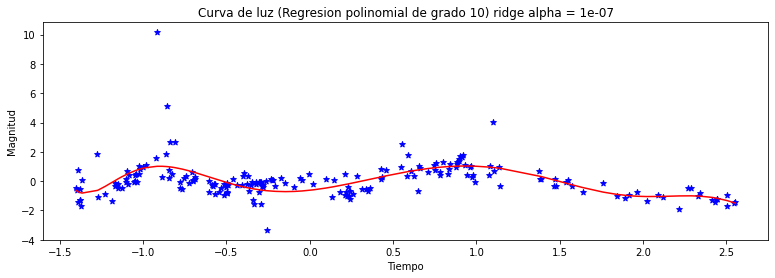

(array([[-1.40326768],
       [-1.39458335],
       [-1.39296882],
       [-1.38867264],
       [-1.38003502],
       [-1.37987977],
       [-1.37831545],
       [-1.37547797],
       [-1.36673697],
       [-1.27385733],
       [-1.26802181],
       [-1.22734706],
       [-1.18816341],
       [-1.16767989],
       [-1.16765293],
       [-1.15041968],
       [-1.14898133],
       [-1.12861022],
       [-1.10371433],
       [-1.10226761],
       [-1.09776599],
       [-1.092213  ],
       [-1.08618115],
       [-1.05302056],
       [-1.05147527],
       [-1.05010745],
       [-1.04140371],
       [-1.0366691 ],
       [-1.02675114],
       [-1.02528657],
       [-1.0208977 ],
       [-1.00060894],
       [-0.98461321],
       [-0.92353031],
       [-0.91626661],
       [-0.88511287],
       [-0.86490442],
       [-0.85768259],
       [-0.84457949],
       [-0.84307868],
       [-0.84145878],
       [-0.82720507],
       [-0.8111816 ],
       [-0.77742966],
       [-0.77634096],
       [-

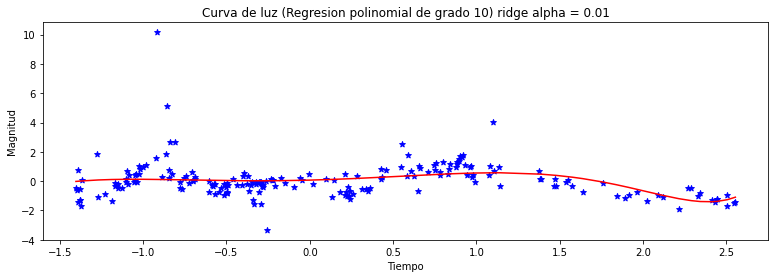

(array([[-1.40326768],
       [-1.39458335],
       [-1.39296882],
       [-1.38867264],
       [-1.38003502],
       [-1.37987977],
       [-1.37831545],
       [-1.37547797],
       [-1.36673697],
       [-1.27385733],
       [-1.26802181],
       [-1.22734706],
       [-1.18816341],
       [-1.16767989],
       [-1.16765293],
       [-1.15041968],
       [-1.14898133],
       [-1.12861022],
       [-1.10371433],
       [-1.10226761],
       [-1.09776599],
       [-1.092213  ],
       [-1.08618115],
       [-1.05302056],
       [-1.05147527],
       [-1.05010745],
       [-1.04140371],
       [-1.0366691 ],
       [-1.02675114],
       [-1.02528657],
       [-1.0208977 ],
       [-1.00060894],
       [-0.98461321],
       [-0.92353031],
       [-0.91626661],
       [-0.88511287],
       [-0.86490442],
       [-0.85768259],
       [-0.84457949],
       [-0.84307868],
       [-0.84145878],
       [-0.82720507],
       [-0.8111816 ],
       [-0.77742966],
       [-0.77634096],
       [-

In [69]:
rid_reg_polymonial(15, 1e-7)
rid_reg_polymonial(15, 0.01)
rid_reg_polymonial(10, 1e-7)
rid_reg_polymonial(10, 0.01)

> Se puede observar de los graficos que a medida que aumenta el alfa, la complejidad del modelo se reduce a pesar del grado dado en la regresion, lo que puede inferir a que los valores de alfa reducen el overfitting los valores muy altos de alfa tambien pueden conllevar al underfittin del modelo.

> Regresion Lasso

In [70]:
def las_reg_polymonial(p, alpha):
    poly_reg = PolynomialFeatures(degree=p)
    t_poly = poly_reg.fit_transform(t_x)
    pol_reg = Lasso(alpha= alpha, normalize=True, max_iter=1e5)
    pol_reg.fit(t_poly, m_y)
    plt.figure(figsize= (13,4))
    plt.scatter(t_x, m_y, color='blue', marker="*")
    plt.plot(t_x, pol_reg.predict(poly_reg.fit_transform(t_x)), color='red')
    plt.title("Curva de luz (Regresion polinomial de grado " + str(p) + ") " + "Lasso alpha = " + str(alpha))
    plt.xlabel('Tiempo')
    plt.ylabel('Magnitud')
    plt.show()
    print((t_x, pol_reg.predict(poly_reg.fit_transform(t_x))))      # imprime los coeficientes de la curva
    return
    

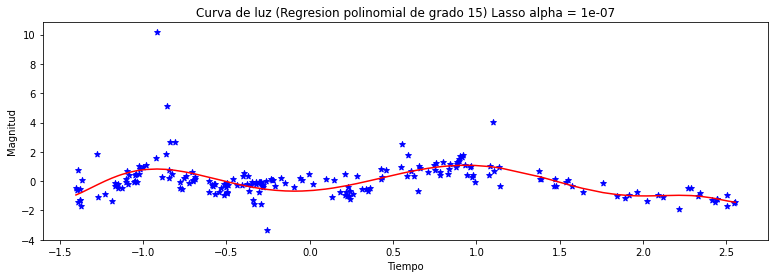

(array([[-1.40326768],
       [-1.39458335],
       [-1.39296882],
       [-1.38867264],
       [-1.38003502],
       [-1.37987977],
       [-1.37831545],
       [-1.37547797],
       [-1.36673697],
       [-1.27385733],
       [-1.26802181],
       [-1.22734706],
       [-1.18816341],
       [-1.16767989],
       [-1.16765293],
       [-1.15041968],
       [-1.14898133],
       [-1.12861022],
       [-1.10371433],
       [-1.10226761],
       [-1.09776599],
       [-1.092213  ],
       [-1.08618115],
       [-1.05302056],
       [-1.05147527],
       [-1.05010745],
       [-1.04140371],
       [-1.0366691 ],
       [-1.02675114],
       [-1.02528657],
       [-1.0208977 ],
       [-1.00060894],
       [-0.98461321],
       [-0.92353031],
       [-0.91626661],
       [-0.88511287],
       [-0.86490442],
       [-0.85768259],
       [-0.84457949],
       [-0.84307868],
       [-0.84145878],
       [-0.82720507],
       [-0.8111816 ],
       [-0.77742966],
       [-0.77634096],
       [-

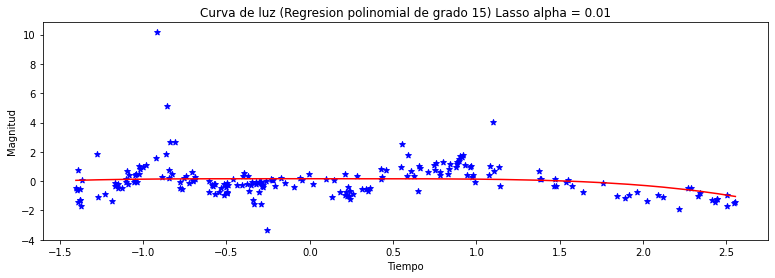

(array([[-1.40326768],
       [-1.39458335],
       [-1.39296882],
       [-1.38867264],
       [-1.38003502],
       [-1.37987977],
       [-1.37831545],
       [-1.37547797],
       [-1.36673697],
       [-1.27385733],
       [-1.26802181],
       [-1.22734706],
       [-1.18816341],
       [-1.16767989],
       [-1.16765293],
       [-1.15041968],
       [-1.14898133],
       [-1.12861022],
       [-1.10371433],
       [-1.10226761],
       [-1.09776599],
       [-1.092213  ],
       [-1.08618115],
       [-1.05302056],
       [-1.05147527],
       [-1.05010745],
       [-1.04140371],
       [-1.0366691 ],
       [-1.02675114],
       [-1.02528657],
       [-1.0208977 ],
       [-1.00060894],
       [-0.98461321],
       [-0.92353031],
       [-0.91626661],
       [-0.88511287],
       [-0.86490442],
       [-0.85768259],
       [-0.84457949],
       [-0.84307868],
       [-0.84145878],
       [-0.82720507],
       [-0.8111816 ],
       [-0.77742966],
       [-0.77634096],
       [-

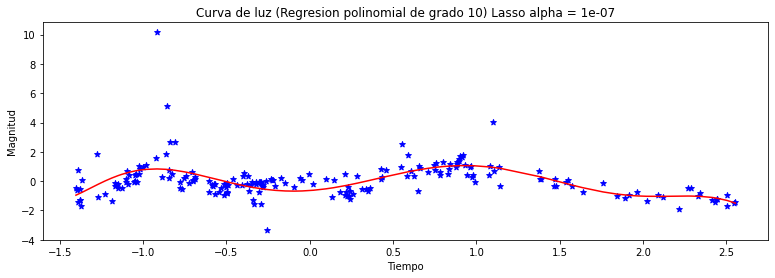

(array([[-1.40326768],
       [-1.39458335],
       [-1.39296882],
       [-1.38867264],
       [-1.38003502],
       [-1.37987977],
       [-1.37831545],
       [-1.37547797],
       [-1.36673697],
       [-1.27385733],
       [-1.26802181],
       [-1.22734706],
       [-1.18816341],
       [-1.16767989],
       [-1.16765293],
       [-1.15041968],
       [-1.14898133],
       [-1.12861022],
       [-1.10371433],
       [-1.10226761],
       [-1.09776599],
       [-1.092213  ],
       [-1.08618115],
       [-1.05302056],
       [-1.05147527],
       [-1.05010745],
       [-1.04140371],
       [-1.0366691 ],
       [-1.02675114],
       [-1.02528657],
       [-1.0208977 ],
       [-1.00060894],
       [-0.98461321],
       [-0.92353031],
       [-0.91626661],
       [-0.88511287],
       [-0.86490442],
       [-0.85768259],
       [-0.84457949],
       [-0.84307868],
       [-0.84145878],
       [-0.82720507],
       [-0.8111816 ],
       [-0.77742966],
       [-0.77634096],
       [-

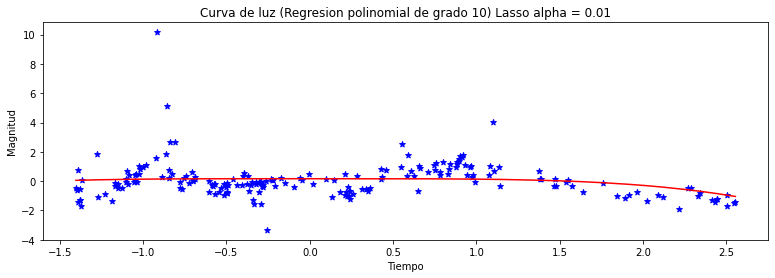

(array([[-1.40326768],
       [-1.39458335],
       [-1.39296882],
       [-1.38867264],
       [-1.38003502],
       [-1.37987977],
       [-1.37831545],
       [-1.37547797],
       [-1.36673697],
       [-1.27385733],
       [-1.26802181],
       [-1.22734706],
       [-1.18816341],
       [-1.16767989],
       [-1.16765293],
       [-1.15041968],
       [-1.14898133],
       [-1.12861022],
       [-1.10371433],
       [-1.10226761],
       [-1.09776599],
       [-1.092213  ],
       [-1.08618115],
       [-1.05302056],
       [-1.05147527],
       [-1.05010745],
       [-1.04140371],
       [-1.0366691 ],
       [-1.02675114],
       [-1.02528657],
       [-1.0208977 ],
       [-1.00060894],
       [-0.98461321],
       [-0.92353031],
       [-0.91626661],
       [-0.88511287],
       [-0.86490442],
       [-0.85768259],
       [-0.84457949],
       [-0.84307868],
       [-0.84145878],
       [-0.82720507],
       [-0.8111816 ],
       [-0.77742966],
       [-0.77634096],
       [-

In [71]:
las_reg_polymonial(15, 1e-7)
las_reg_polymonial(15, 0.01)
las_reg_polymonial(10, 1e-7)
las_reg_polymonial(10, 0.01)

> Para la penalizacion Lasso y los mismos valores de regresion y alfa, los coeficientes Lasso son mucho mas pequeños en comparacion con el modelo Ridge a medida que aumenta alfa, lo que puede concluir que para este caso la penalizacion Lasso tiene un peor ajuste que Ridge, llegando a ser similiar a un ajuste recto para el dataset.

### Clasificación de estrellas variables

* base de datos de estrellas variables ts2.csv

In [72]:
import seaborn as sns

data2 = pd.read_csv("ts2.csv") 
data2.info()                        # no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class             5000 non-null   object 
 1   Amplitude         5000 non-null   float64
 2   AndersonDarling   5000 non-null   float64
 3   Autocor_length    5000 non-null   int64  
 4   Beyond1Std        5000 non-null   float64
 5   Gskew             5000 non-null   float64
 6   LinearTrend       5000 non-null   float64
 7   MaxSlope          5000 non-null   float64
 8   Mean              5000 non-null   float64
 9   Meanvariance      5000 non-null   float64
 10  MedianAbsDev      5000 non-null   float64
 11  MedianBRP         5000 non-null   float64
 12  PercentAmplitude  5000 non-null   float64
 13  PeriodLS          5000 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 547.0+ KB


* análisis descriptivo y procesamiento para separar el target de la matrix descriptiva

In [73]:
data2.head()

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,lpv,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,lpv,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,ecl,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,lpv,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,lpv,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


In [74]:
data2.describe(include="all")

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
unique,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,lpv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.106905,0.130491,4.545400,0.317532,0.016345,0.000001,2.175457,14.988370,0.003703,0.039180,0.414658,0.010616,302.831851
std,NaN,0.147896,0.202838,6.121163,0.060427,0.126287,0.000684,9.423721,1.889971,0.005527,0.062624,0.122715,0.014490,944.665723
min,NaN,0.007000,0.000000,1.000000,0.070470,-1.763000,-0.016436,0.006402,11.666225,0.000259,0.002000,0.069444,0.000893,0.005627
25%,NaN,0.021000,0.000016,1.000000,0.290000,-0.004000,-0.000015,0.096856,13.608853,0.000743,0.007000,0.336667,0.002375,0.987460
50%,NaN,0.043500,0.020842,2.000000,0.318182,0.002500,-0.000002,0.342336,14.514339,0.001596,0.014000,0.411089,0.004850,18.144685
75%,NaN,0.143500,0.185764,5.000000,0.348214,0.017000,0.000009,1.038683,15.592764,0.005258,0.051500,0.480000,0.014186,189.760635


In [75]:
data2["Class"].value_counts()

lpv       3775
rrlyr      506
ecl        484
cep        107
NonVar      82
dsct        32
t2cep       11
acep         2
dpv          1
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

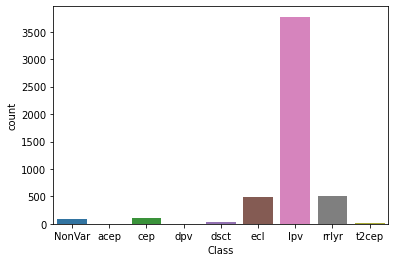

In [76]:
data2["Class"] = data2["Class"].astype("category")
sns.countplot(data2["Class"])

In [77]:
target = data2["Class"]
target = target.astype("category").cat.codes
descript = data2.drop(["Class"], axis=1)

* Separar la base de datos de prueba correspondiente a un 40% del total
- Se observa que los datos no fueron muy bien clasificados a pesar de establecer una prueba de 40% con criterio entropico, solo concentra la clasificacion en las tres categorias con mayor frecuencia, mientras que las demas categorias no son consideradas

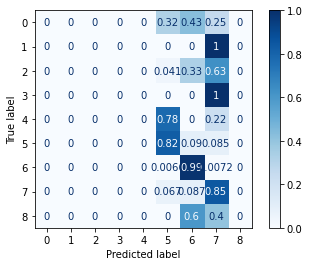

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(descript, target, test_size=0.4, random_state=0)
clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
clf.fit(X_train, y_train)
target_pred1 = clf.predict(X_test)
disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize="true")

* Separar la base de datos de prueba correspondiente a un 60% del total
- Al aumentar los datos de prueba mejora ligeramente el accuracy del modelo, manteniendo la clasificacion en las categorias con mayor frecuencia y clasificando solo un 15% de los datos en la categoria 2 (cep) de manera correcta.

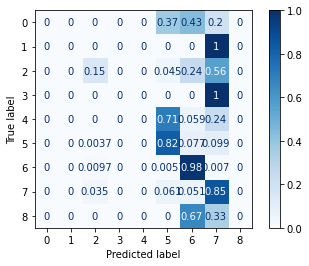

In [79]:
X_train, X_test, y_train, y_test = train_test_split(descript, target, test_size=0.6, random_state=0)
clf = DecisionTreeClassifier(max_depth=2, criterion="gini")
clf.fit(X_train, y_train)
target_pred2 = clf.predict(X_test)
disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize="true")

> Clasificador KNN

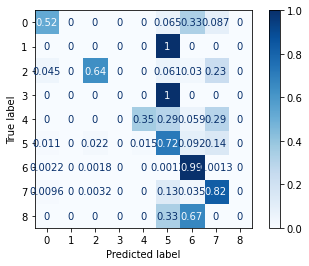

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
target_pred3 = knn.predict(X_test)

disp = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, normalize="true")

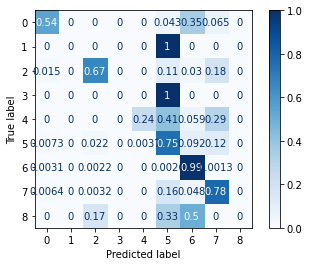

In [81]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
target_pred4 = knn.predict(X_test)

disp = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, normalize="true")

* Se observa que para el clasificador KNN, la distribucion para la clasificacion es mas adecuada en vez de los metodos anteriores, la accuracy para esta prueba es un 2% mayor que cuando se aplico el modelo de arbol de decision.
* Para el argumento de KNN de "n_neighbors", se ejecuto varias vaces cambiando la cantidad de vecinos y se observo que a medida que aumenta la cantidad la accuracy va disminuyendo, se opto por mantener una cantidad de "3" para este argumento, ya que este mantenia el accuracy en su maximo.

In [82]:
accuracy_score(y_test,target_pred2)     # accuracy para el modelo de arbol de decision 

0.9086666666666666

In [83]:
accuracy_score(y_test,target_pred3)     # accuracy para KNN con 3 neighbors

0.929

In [85]:
accuracy_score(y_test,target_pred4)     # accuracy para KNN con 4 neighbors

0.9263333333333333